In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from time import time

# Import our RBM
from crbm.rbm import CRBM

In [2]:
# Function for reading data file
import struct
def read_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

In [3]:
X_test = read_idx("data/MNIST/raw/t10k-images-idx3-ubyte").reshape(-1, 28*28)
X = read_idx("data/MNIST/raw/train-images-idx3-ubyte").reshape(-1, 28*28)
y_test = read_idx("data/MNIST/raw/t10k-labels-idx1-ubyte")
y = read_idx("data/MNIST/raw/train-labels-idx1-ubyte")

# EXTREMELY IMPORTANT TO NORMALIZE
X = np.true_divide(X, 255)
X_test = np.true_divide(X_test, 255)

In [4]:
# Some hand picked images for each class for plotting
selected_imgs = X[[1, 6, 5, 12, 26, 35, 62, 52, 46, 4]]

In [5]:
# Train-val split
split = 0.1
indices = np.arange(len(X))
np.random.shuffle(indices)
X_val = X[:int(split*X.shape[0])]
X_train = X[int(split*X.shape[0]):]
y_val = y[:int(split*X.shape[0])]
y_train = y[int(split*X.shape[0]):]
print("Number of training instances:\t", y_train.shape[0])
print("Number of validation instances:\t", y_val.shape[0])
print("Number of test instances:\t", y_test.shape[0])

Number of training instances:	 54000
Number of validation instances:	 6000
Number of test instances:	 10000


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
print("Number of training instances:\t", y_train.shape[0])
print("Number of validation instances:\t", y_val.shape[0])
print("Number of test instances:\t", y_test.shape[0])

Number of training instances:	 54000
Number of validation instances:	 6000
Number of test instances:	 10000


In [7]:
def get_batches(data, batch_size, shuffle=False):
    '''
    Function to provide data in batches.
    input:
        - data: The data to be batched, each sample in one row.
        - batch_size: Size of one batch (last batch might be smaller)
        - shuffle: True if data should be shuffled.
    '''
    if(shuffle):
        np.random.shuffle(data)
    if(batch_size == -1):
        batch_size = len(data)
    num_batches = math.ceil(data.shape[0]/batch_size)
    for batch_num in range(num_batches):
        yield data[batch_num*batch_size:(batch_num+1)*batch_size]

In [8]:
# Some parameters to set
batch_size = 50
num_epochs = 100
lr = 0.1
burn_in = 0
num_steps = 1

In [9]:
model = CRBM(v_dim=X_train.shape[-1], h_dim=100)

In [10]:
from time import time
# Training loop
errors = []
free_energies_val = []
free_energies_train = []
start_time = time()

for epoch in range(1, num_epochs+1):
    iteration = 0
    error = 0
    for batch in get_batches(X_train, batch_size, shuffle=True):
        iteration += 1
   
        # Compute gradients and errors
        error += model.compute_grad(batch)
        
        # Update parameters - use momentum as explained in Hinton's guide
        if(epoch > 5):
            model.update(lr, momentum=0.5)
        else:
            model.update(lr, momentum=0.9)
        
    #plot_images(rbm, selected_imgs, 
    #        title="Reconstructed Images    Epoch: {}".format(epoch),
    #        save_as="recon_" + str(epoch))
        
    print("epoch:{} \t error:{:.4f} \t training time:{:.2f} s".format(epoch, error, time()-start_time))
    errors.append(error)

epoch:1 	 error:28254.5150 	 training time:14.00 s
epoch:2 	 error:16364.1993 	 training time:24.64 s
epoch:3 	 error:14952.0031 	 training time:35.07 s
epoch:4 	 error:14230.3935 	 training time:45.30 s
epoch:5 	 error:13799.0205 	 training time:54.80 s
epoch:6 	 error:13488.6402 	 training time:64.57 s
epoch:7 	 error:13271.0885 	 training time:73.81 s
epoch:8 	 error:13083.4748 	 training time:82.79 s
epoch:9 	 error:12939.7690 	 training time:92.76 s
epoch:10 	 error:12823.5898 	 training time:103.12 s
epoch:11 	 error:12711.9225 	 training time:113.49 s
epoch:12 	 error:12602.3709 	 training time:123.05 s
epoch:13 	 error:12523.5787 	 training time:132.79 s
epoch:14 	 error:12455.2905 	 training time:142.57 s
epoch:15 	 error:12385.3780 	 training time:151.49 s
epoch:16 	 error:12319.4818 	 training time:160.44 s
epoch:17 	 error:12274.1223 	 training time:169.86 s
epoch:18 	 error:12207.7960 	 training time:180.18 s
epoch:19 	 error:12160.4641 	 training time:191.90 s
epoch:20 	 

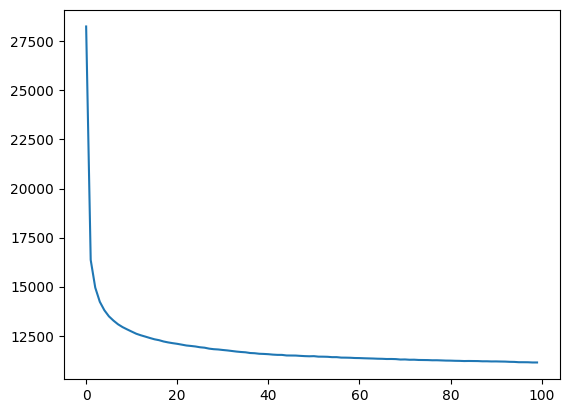

In [11]:
# plotting energy
plt.plot(errors)
plt.savefig("error_plot")

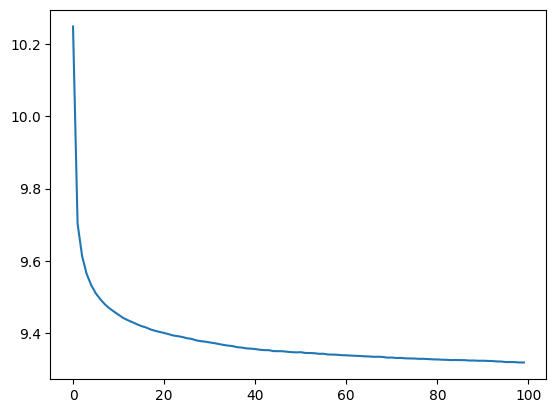

In [12]:
# plotting energy
plt.plot(np.log(np.array(errors)))
plt.savefig("error_plot")

<Figure size 640x480 with 0 Axes>

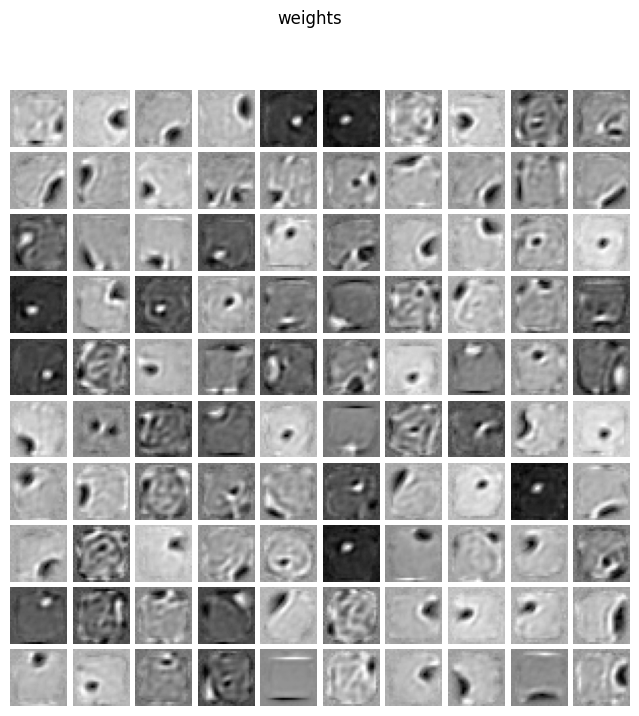

In [13]:
plt.clf()
title="weights"
fig, axes = plt.subplots(10, 10, gridspec_kw = {'wspace':0.1, 'hspace':0.1}, figsize=(8, 8))
fig.suptitle(title)
for i in range(10):
    for j in range(10):
        axes[i, j].imshow(model.W[:,i*10+j].reshape(28, 28), cmap='gray')
        axes[i, j].axis('off')
        
plt.savefig("weights")
plt.show()
plt.close()

<Figure size 640x480 with 0 Axes>

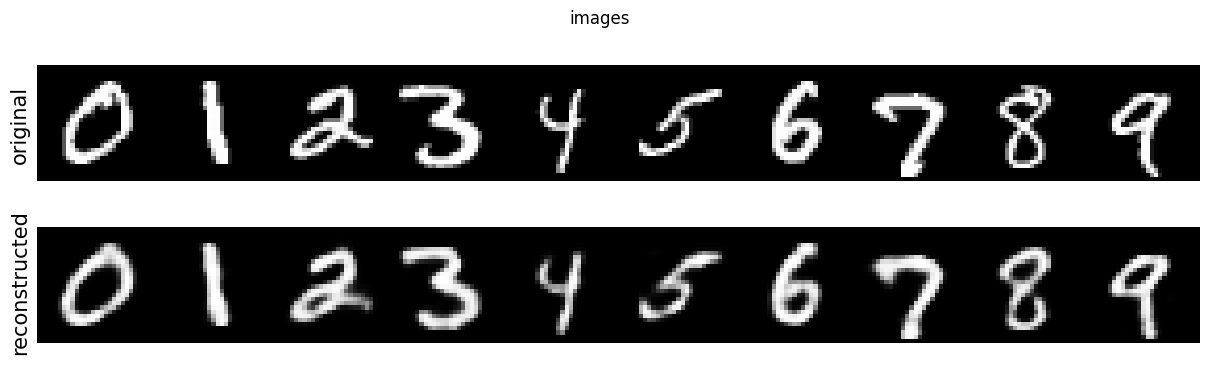

In [54]:
images = selected_imgs
num_samples = len(selected_imgs)
plt.clf()
fig, axes = plt.subplots(2, num_samples, gridspec_kw = {'wspace':0, 'hspace':0.1}, figsize=(1.5*num_samples, 4))
fig.suptitle("images")
text = axes[0, 0].text(-7,14,"original", size=15,
                       verticalalignment='center', rotation=-270)
text = axes[1, 0].text(-7, 13,"reconstructed", size=15,
                       verticalalignment='center', rotation=-270)
for n in range(num_samples):
    axes[0, n].imshow(images[n].reshape(28, 28), cmap='gray')
    axes[1, n].imshow(model.get_reconstruction(images[n].reshape(28*28)).reshape(28, 28), cmap='gray')
    axes[0, n].axis('off')
    axes[1, n].axis('off')
plt.savefig("Reconstruction_CRBM.pdf")
plt.show()
plt.close()

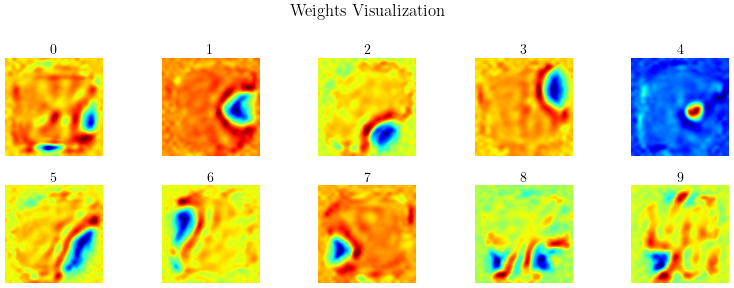

In [59]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import scienceplots
from matplotlib.colors import LinearSegmentedColormap

from matplotlib.colors import LinearSegmentedColormap

# Define your custom color palette (hex codes from your extended palette)
hex_colors = ['#FFFFFF', '#9FFA8E', '#7F170C', '#0018BC', '#EF8833', '#FDF551']
custom_cmap = LinearSegmentedColormap.from_list('custom_weights', hex_colors, N=256)


# Set scienceplot style
with plt.style.context(['science']):
    
    #colors = ['#123456', '#1a3c34', '#d35400']  # Dark blue, dark green, dark orange
    #custom_cmap = LinearSegmentedColormap.from_list('custom_weights', colors)
    # List of predefined colormaps to test
    #colormaps = ['viridis', 'plasma', 'magma', 'inferno', 'RdYlBu', 'RdBu', 'coolwarm', 'seismic', 'twilight', 'hsv']


    # Plot weights
    fig, axes = plt.subplots(2, 5, figsize=(8,3))
    plt.suptitle("Weights Visualization")
    

    # Assuming model.W is a weight matrix, plot the first 10 weight vectors as 28x28 images
    for i in range(2):
        for j in range(5):
            idx = i * 5 + j
            axes[i, j].imshow(model.W[:,i*10+j].reshape(28, 28),cmap='jet',interpolation='lanczos') #RdYlBu #cmap=custom_cmap
            axes[i, j].axis('off')# Hide unused axes
            # Add a titlabelle for each subplot
            axes[i, j].text(0.5, 1.05, f' {idx}', transform=axes[i, j].transAxes,ha='center')
                               #ha='center', va='bottom', color='white', fontsize=10)
                              # bbox=dict(facecolor='black', alpha=0.7, edgecolor='none'))
    # Adjust layout
    plt.tight_layout()
    fig.subplots_adjust(top=0.8)
    #fig.subplots_adjust(top=0.85)  # Adjust to prevent title overlap


    # Save as PDF
    plt.savefig('weights_visualization.pdf', bbox_inches='tight')
    plt.show()